In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
path = "C:\\Users\\Asus\\Downloads\\Student_Performance.csv"

In [24]:
data = pd.read_csv(path)

In [25]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [26]:
# checking if their is null values present in the dataset.
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [31]:
data = data.drop("Extracurricular Activities", axis = 1)

In [6]:
# checking the duplicate value if present in dataset.
duplicates = data.duplicated()

In [7]:
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
no_duplicates = data.drop_duplicates()
print(no_duplicates)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

<Axes: ylabel='Density'>

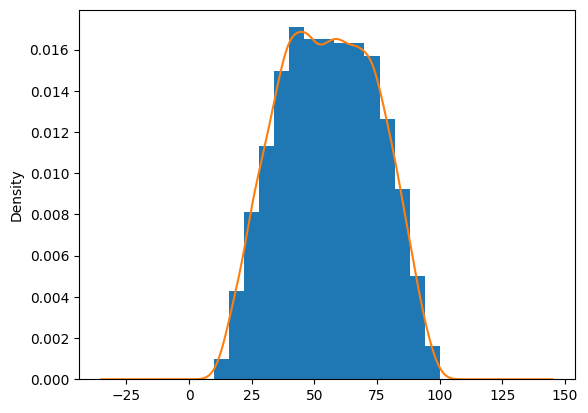

In [10]:
#Performance Index = This is often used in educational systems to measure the academic performance of schools or students. It might be based on standardized test scores, grades, or other educational achievements.
axes = data['Performance Index'].hist(bins = 15, density = True)
data['Performance Index'].plot(kind = 'density')

In [37]:
X = data["Performance Index"]

In [38]:
X

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [39]:
X.isnull().sum()

np.int64(0)

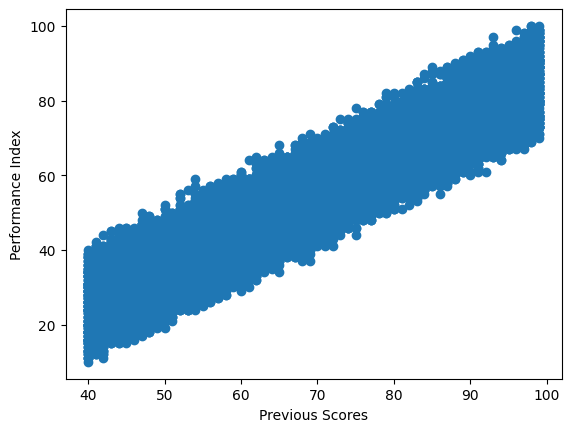

In [46]:
# triyng to et a graph between dependent variableb "Performance Index" and independent variable "Previous Scores"
plt.scatter(data["Previous Scores"], data["Performance Index"])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()            

In [47]:
# Performance Index is a dependent variable with depends on previous scores, Hourss etc.
y = data["Performance Index"]

In [48]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [49]:
X = data.drop("Performance Index", axis = 1)

In [50]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [51]:
from sklearn.model_selection import train_test_split

In [79]:
# spliting the training and testing set from the dataset. ratio of training to testing will be 80:20. (random_state = 10--> it will fix the dataset values.) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [80]:
len(X_train)

8000

In [81]:
len(X_test)

2000

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
clt = LinearRegression()

In [84]:
clt.fit(X_train, y_train)

LinearRegression()

In [85]:
clt.predict(X_test)

array([26.5846906 , 26.29039438, 42.44729936, ..., 39.58569605,
       51.36430354, 39.60395834])

In [86]:
y_test

4366    27.0
9162    27.0
4118    42.0
2437    46.0
3644    78.0
        ... 
6555    63.0
9906    40.0
1651    41.0
5897    52.0
2321    40.0
Name: Performance Index, Length: 2000, dtype: float64

In [92]:
# checking the accuracy of the dataset will is going to be 0.98 or 98.86%.
# accuracy do not depends upon ratio of traning and testing sets. 
accuracy = clt.score(X_test, y_test)

In [93]:
accuracy

0.9883504209627967